In [205]:
import pandas as pd 
import matplotlib.pyplot as plt

In [206]:
DATA_PATH = '../1. Data/'
WASTE_PATH = DATA_PATH+'waste.csv'

In [207]:
df = pd.read_csv('../1. Data/waste.csv', delimiter=';', decimal='.')
df['date'] = pd.to_datetime(df['date'])  # convert date column to datetime format

In [208]:
df.head()

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006


In [209]:
# show timespan of data
df['date'].min(), df['date'].max()

(Timestamp('2021-02-02 08:00:00'), Timestamp('2022-12-31 18:00:00'))

Text(0, 0.5, '')

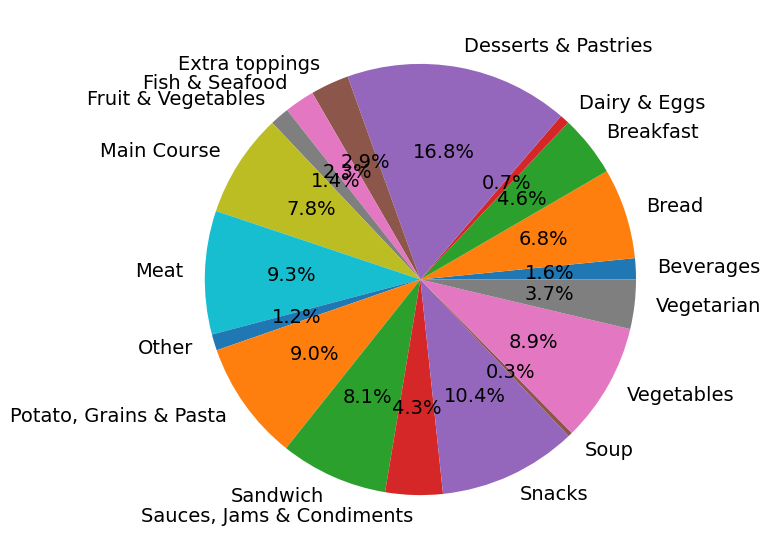

In [213]:
# pie chart of waste per food category
df.groupby('food_category').sum()['waste'].plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=14)
plt.ylabel('')

## Companies don't care only about weight, they also care about value

Our objective is to reduce the amount of waste and at the same time minimize the costs associated to this waste.  Using the data provided by April 2020 Nutrition Journal 19(1) and the IKEA menus and food prices, we have extracted wights to obtain a metric that includes not only weight but also value. 

This new metric is a paradigm shift in the way we think about waste.  We now can reduce the amount of waste generated focusing on the most valuable items.  This is a win-win situation for the company and the environment.

In [181]:
category_value = {'Extra toppings': 0.1,
                    'Meat': 1,
                    'Potato, Grains & Pasta': 0.2,
                    'Sandwich': 0.8,
                    'Fruit & Vegetables': 0.8,
                    'Main Course':1,
                    'Desserts & Pastries': 0.2,
                    'Vegetarian': 0.5,
                    'Sauces, Jams & Condiments': 0.1,
                    'Snacks': 0.1,
                    'Vegetables': 0.8,
                    'Bread': 0.1,
                    'Soup': 0.1,
                    'Beverages': 0.1,
                    'Fish & Seafood': 1,
                    'Breakfast': 0.5,
                    'Dairy & Eggs': 0.8,
                    'Other': 0.5}

# create new value column in dataframe by multiplying waste and value
df['value'] = df['waste'] * df['food_category'].map(category_value)

df.head()

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste,value
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042,1.390604
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053,5.270211
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216,18.406573
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006,14.628804


### Last 30 days of waste

In [182]:
# keep city Barcelona, kitchen B, and food_category Meat

def plot_last_days(df, city, kitchen, food_category):
    df_to_predict = df[(df['location'] == city) & (df['kitchen_type'] == kitchen) & (df['food_category'] == food_category)]
    
    # sort by date
    df_to_predict = df_to_predict.sort_values(by='date')

    # plot last 30 days
    df_to_predict[-30:].plot(x='date', y='value', kind='bar', figsize=(20,10))
    plt.show()
    

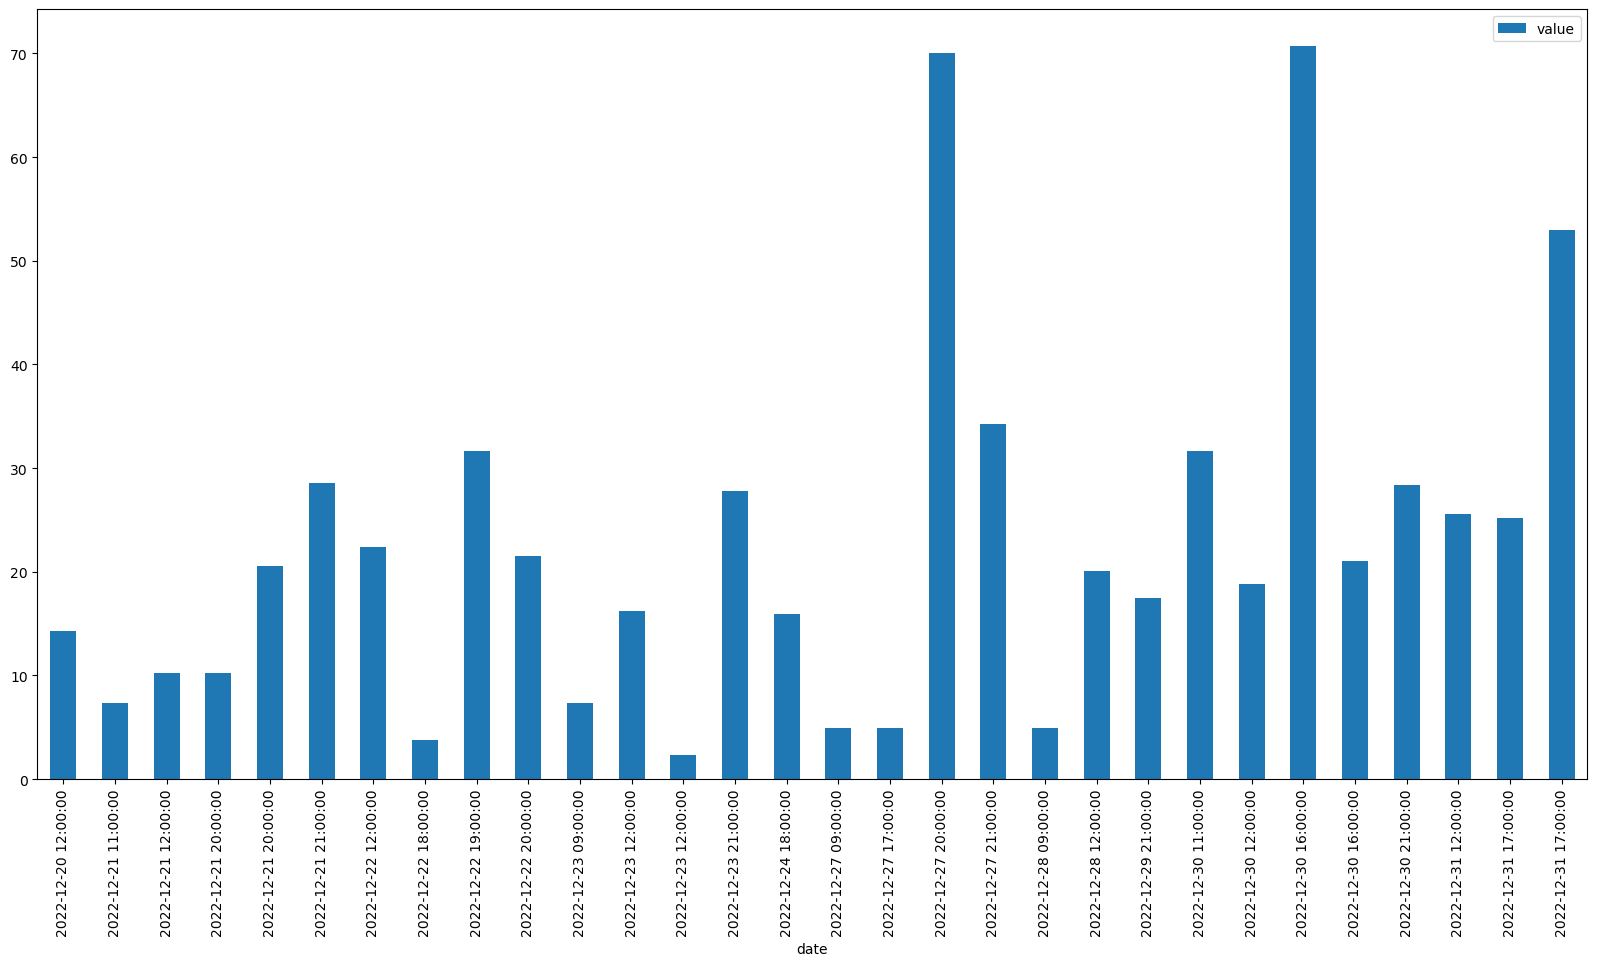

In [183]:
plot_last_days(df,'Barcelona', 'B', 'Meat')

## Kitchen analysis

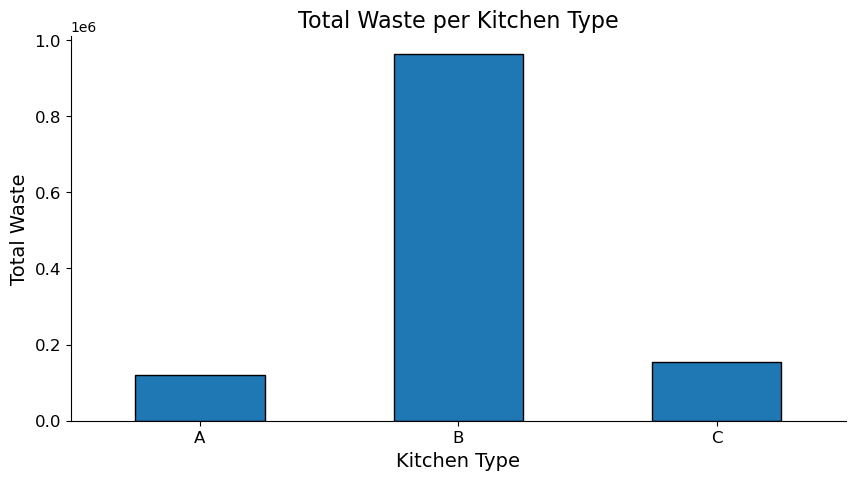

In [184]:
# Compute total waste per kitchen type
waste_per_kitchen = df.groupby('kitchen_type')['waste'].sum()

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the waste per kitchen as a bar chart
waste_per_kitchen.plot(kind='bar', ax=ax, edgecolor='black')

# Set the axis labels and title
ax.set_xlabel('Kitchen Type', fontsize=14)
ax.set_ylabel('Total Waste', fontsize=14)
ax.set_title('Total Waste per Kitchen Type', fontsize=16)

# Set the tick labels to be more readable
ax.tick_params(axis='x', labelrotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

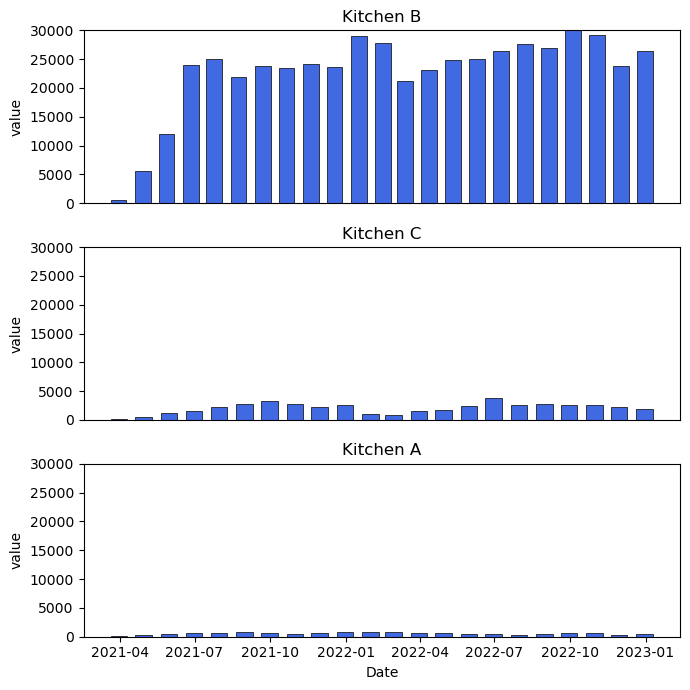

In [ ]:
# monthly waste per kitchen type
fig, axs = plt.subplots(nrows=len(df['kitchen_type'].unique()), figsize=(7,7))

for i, kitchen_type in enumerate(df['kitchen_type'].unique()):
    df = df[df['kitchen_type'] == kitchen_type].groupby(pd.Grouper(key='date', freq='M'))['value'].sum()
    axs[i].bar(df.index, df.values, width=20, edgecolor='black', linewidth=0.5, color='royalblue')
    axs[i].set_title('Kitchen '+kitchen_type)
    axs[i].set_ylabel('value')
    axs[i].set_ylim(0, 30000)
    
    # show xticks on the last subplot only
    if i == len(df['kitchen_type'].unique()) - 1:
        axs[i].set_xlabel('Date')
    else:
        axs[i].set_xticks([])
        
plt.tight_layout()
plt.show()

### Weekday with more waste

Text(0.5, 0, 'Weekday')

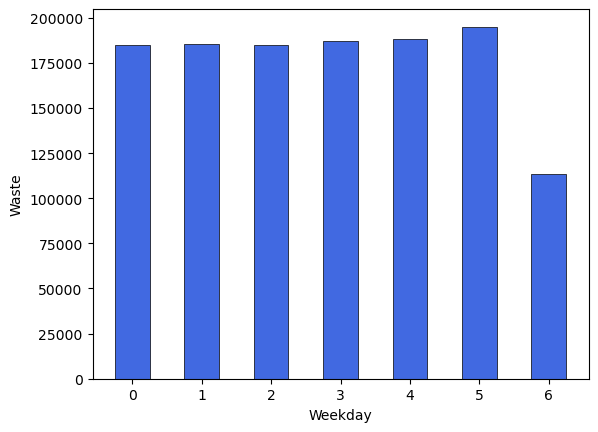

In [ ]:
# display boxplot of waste per weekday
df['weekday'] = pd.to_datetime(df['date']).dt.weekday

grouped = df.groupby('weekday')['waste'].sum()

plt.bar(grouped.index, grouped.values, width=0.5, edgecolor='black', linewidth=0.5, color='royalblue')
plt.ylabel('Waste')
plt.xlabel('Weekday')

### Monthday with more waste

Text(0.5, 0, 'Monthday')

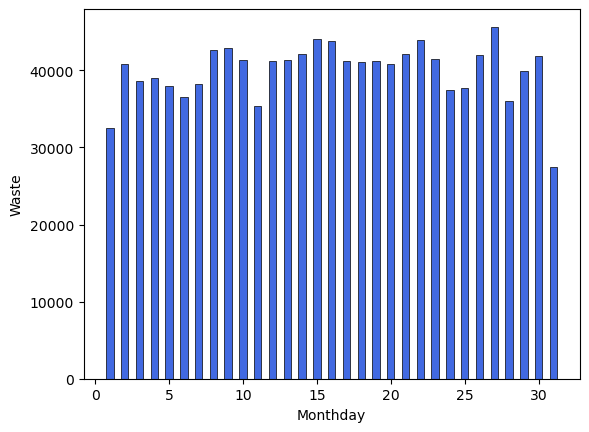

In [ ]:
# display boxplot of waste per weekday
df['weekday'] = pd.to_datetime(df['date']).dt.day

grouped = df.groupby('weekday')['waste'].sum()

plt.bar(grouped.index, grouped.values, width=0.5, edgecolor='black', linewidth=0.5, color='royalblue')
plt.ylabel('Waste')
plt.xlabel('Monthday')

### Waste by hour

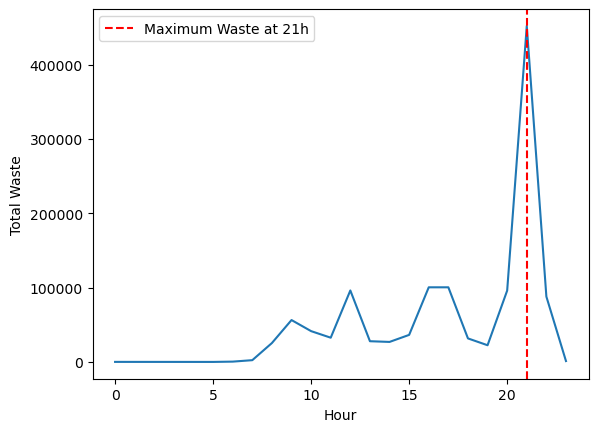

In [ ]:
# Extract the hour from the date column
df['hour'] = pd.to_datetime(df['date']).dt.hour

# Group the data by hour and sum the waste values
grouped = df.groupby('hour')['waste'].sum()

# Find the hour with the most waste
max_hour = grouped.idxmax()

# Create the plot
plt.plot(grouped.index, grouped.values)
plt.axvline(x=max_hour, color='r', linestyle='--', label=f'Maximum Waste at {max_hour}h')
plt.xlabel('Hour')
plt.ylabel('Total Waste')
plt.legend()
plt.show()

### More wasteful categories

In [ ]:
# function to obtain the 10 most wastefull items
def get_top_category(df, kitchen, num):
    df = df[df['kitchen_type'] == kitchen]
    top = df.groupby('food_category').sum().sort_values('waste', ascending=False).head(num)
    print('Top most wastefull food categories in', kitchen, 'kitchens')

    return top

In [ ]:
get_top_category(df, 'A', 10)

Top most wastefull food categories in A kitchens


,item,waste,value
food_category,,,
Snacks,1818202.0,96643.244093,9664.324409
"Sauces, Jams & Condiments",680882.0,15325.633772,1532.563377
Desserts & Pastries,130092.0,4693.071264,938.614253
Beverages,6077.0,4102.061231,410.206123


In [ ]:
get_top_category(df, 'B', 10)

Top most wastefull food categories in B kitchens


,item,waste,value
food_category,,,
Desserts & Pastries,4279716.0,142743.408550,28548.681710
"Potato, Grains & Pasta",1469154.0,111161.587677,22232.317535
Vegetables,1932319.0,110362.277509,88289.822007
Sandwich,2832519.0,97368.853510,77895.082808
Meat,1383955.0,96987.710273,96987.710273
Main Course,2848047.0,96614.691341,96614.691341
Bread,794836.0,70990.769027,7099.076903
Breakfast,1437742.0,56985.066169,28492.533085
Vegetarian,404028.0,45742.720789,22871.360395


In [ ]:
get_top_category(df, 'C', 10)

Top most wastefull food categories in C kitchens


,item,waste,value
food_category,,,
Desserts & Pastries,2474830.0,60421.237879,12084.247576
Snacks,1654070.0,32054.281423,3205.428142
Meat,420399.0,17621.304559,17621.304559
Other,313461.0,15023.923586,7511.961793
Bread,401467.0,13195.327305,1319.532731
Beverages,213880.0,6819.684136,681.968414
"Sauces, Jams & Condiments",297847.0,6676.176027,667.617603
Sandwich,113392.0,2728.645498,2182.916398


Top most wastefull food categories in A kitchens


<AxesSubplot:title={'center':'Top 10 most wastefull food categories in kitchen A'}, ylabel='waste'>

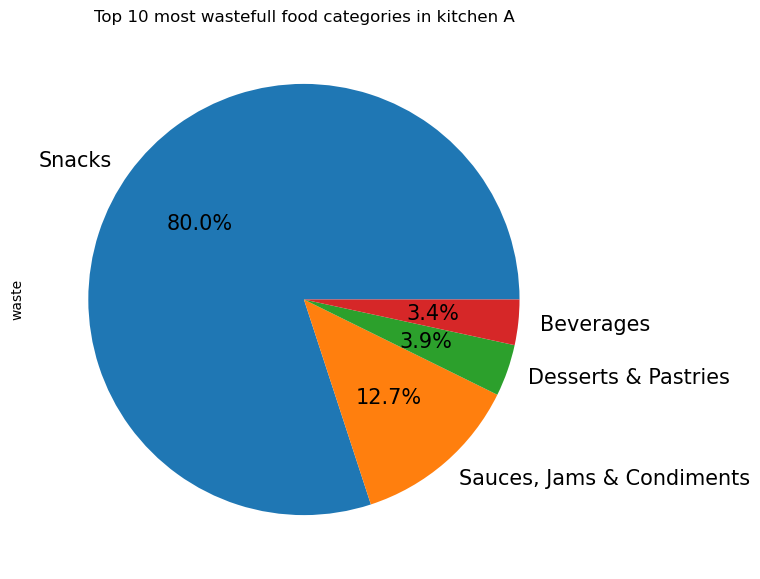

In [ ]:
# pie chart of top 10 most wastefull food categories in kitchen A
top = get_top_category(df, 'A', 10)
top['waste'].plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=15, title='Top 10 most wastefull food categories in kitchen A')

Top most wastefull food categories in B kitchens


<AxesSubplot:title={'center':'Kitchen B'}, ylabel='waste'>

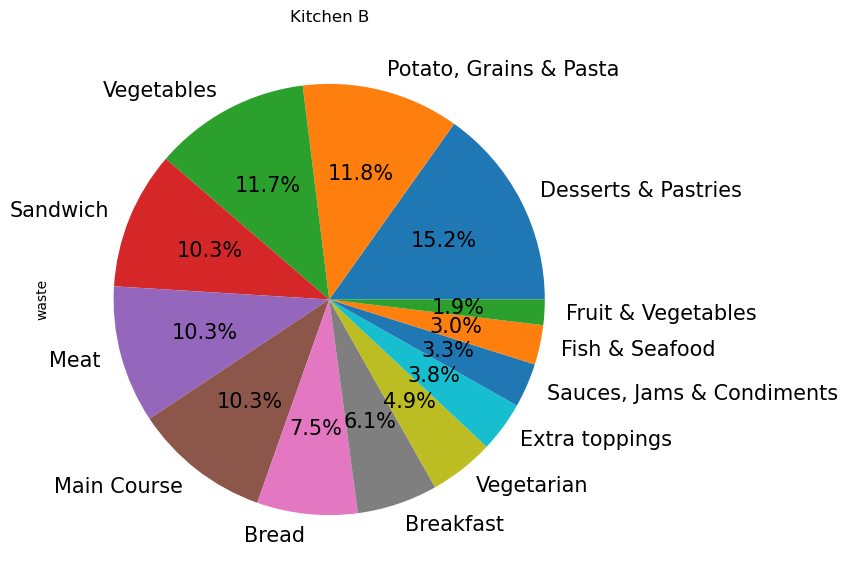

In [ ]:
# pie chart of top 10 most wastefull food categories in kitchen A
top = get_top_category(df, 'B', 40)
# group small categories together and drop them from the dataframe
top = top[top['waste'] >= 10000]

top['waste'].plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=15, title='Kitchen B')


Top most wastefull food categories in B kitchens


Text(0, 0.5, '')

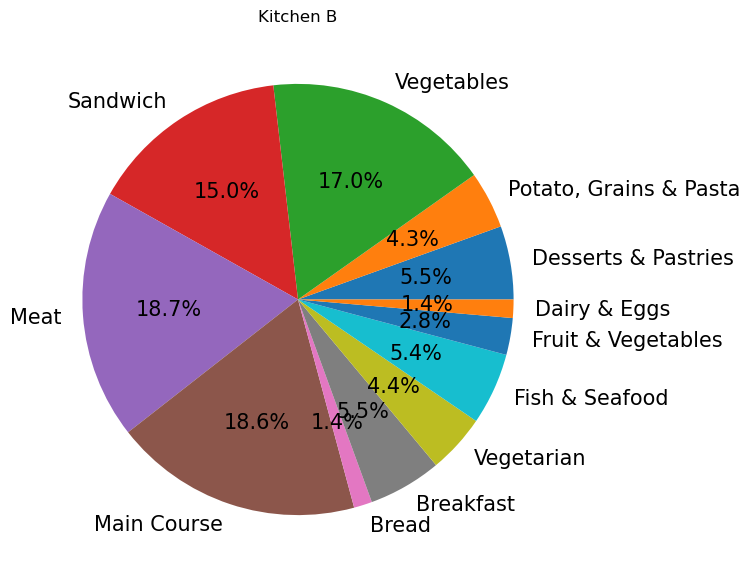

In [ ]:
# pie chart of top 10 most wastefull food categories in kitchen A
top = get_top_category(df, 'B', 40)
top = top[top['value'] >= 4000]
top['value'].plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=15, title='Kitchen B')
plt.ylabel('')

Top most wastefull food categories in C kitchens


<AxesSubplot:title={'center':'Top 10 most wastefull food categories in kitchen C'}, ylabel='waste'>

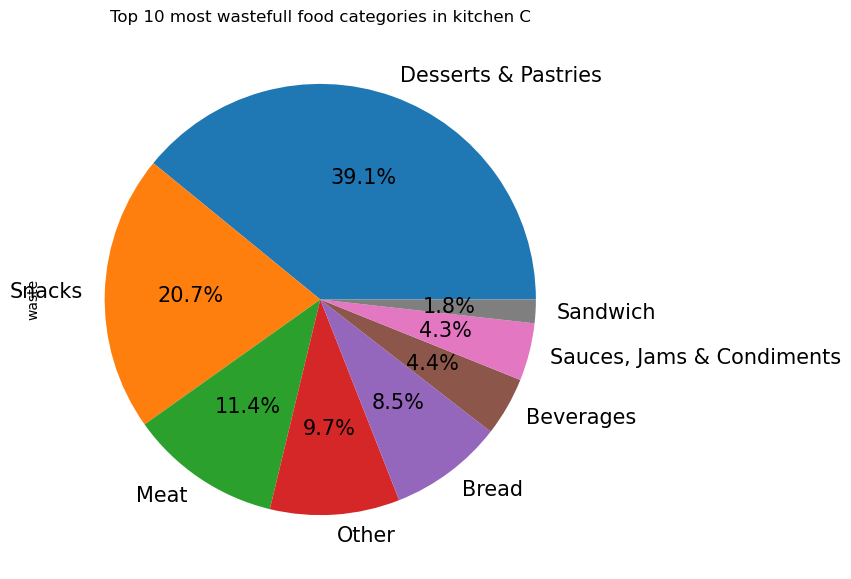

In [ ]:
# pie chart of top 10 most wastefull food categories in kitchen A
top = get_top_category(df, 'C', 10)
top['waste'].plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=15, title='Top 10 most wastefull food categories in kitchen C')

### Reason analysis

Text(0, 0.5, '')

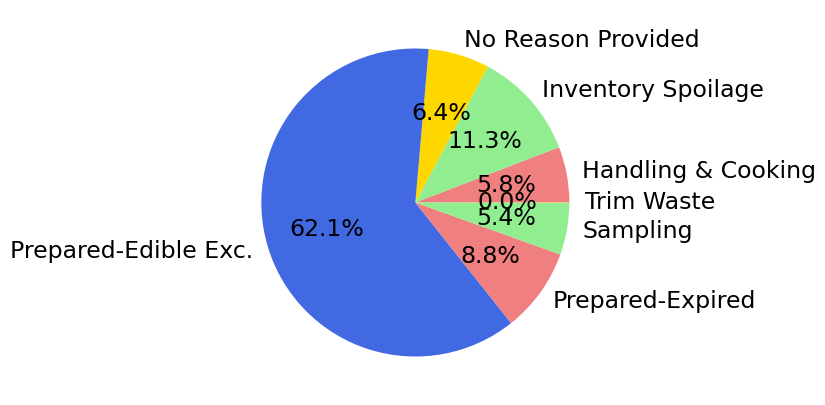

In [ ]:
# pie chart of total waste by reason 
df.groupby('reason')['waste'].sum().plot.pie(figsize=(5,5), autopct='%1.1f%%', fontsize=17,
                                             colors=['lightcoral', 'lightgreen', 'gold','royalblue'])
plt.ylabel('')

<AxesSubplot:title={'center':'Reason for waste'}, ylabel='reason'>

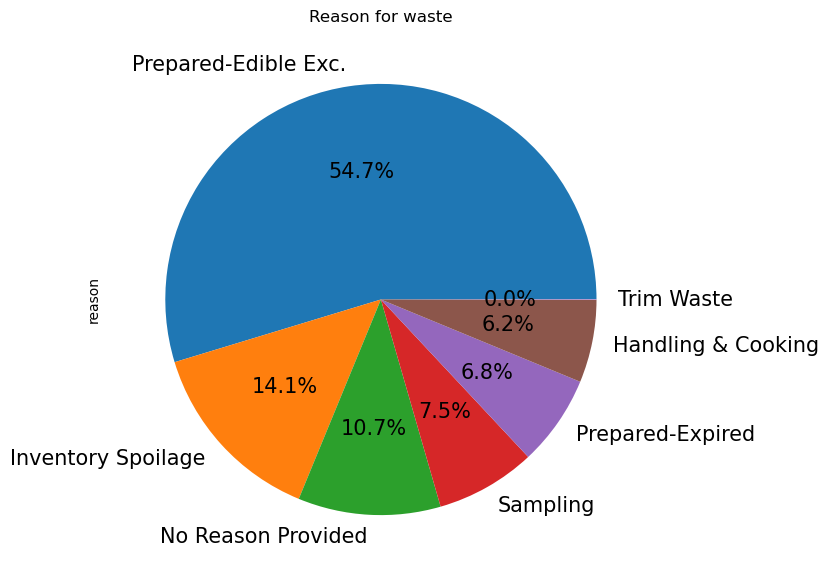

In [ ]:
# pie chart of reason for waste
df['reason'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=15, title='Reason for waste')